<a href="https://colab.research.google.com/github/Sottix99/SMOS_Final_Project/blob/main/ESS8Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load

In [155]:
%%capture
import numpy as np
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import csv
import os
import missingno as msno
from collections import Counter
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
import statistics
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import preprocessing
import plotly.express as px
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv(r'/content/drive/MyDrive/SMOS/ESS8e02_2.csv',low_memory=False)

In [4]:
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
0,ESS8e02_2,8,2.2,10.12.2020,1,AT,0.611677,1.178495,0.370393,0.436506,...,12,2016,7,37,5,12,2016,8,33,50.0
1,ESS8e02_2,8,2.2,10.12.2020,2,AT,1.223354,0.899471,0.370393,0.333158,...,11,2016,9,39,25,11,2016,11,10,86.0
2,ESS8e02_2,8,2.2,10.12.2020,4,AT,0.389058,0.315753,0.370393,0.116953,...,11,2016,17,17,22,11,2016,18,0,38.0
3,ESS8e02_2,8,2.2,10.12.2020,6,AT,0.642594,0.472467,0.370393,0.174999,...,10,2016,19,9,11,10,2016,19,59,46.0
4,ESS8e02_2,8,2.2,10.12.2020,10,AT,3.432402,2.246706,0.370393,0.832164,...,12,2016,10,31,1,12,2016,11,49,70.0


There are a lot of columns, we want to use only few of them, in particular:





* `health`

* `brncntr`

* `stfeco`

* `rlgdgr`


* `wrclmch`: How worried about climate change? 

* `ccnthum` : Climate change caused by natural processes, human activity, or both?

* `lrscale` : In politics people sometimes talk of 'left' and 'right'. Using this card, where would you place yourself on this scale, where 0 means the left and 10 means the right?

* `eisced`: Highest level of education, ES - ISCED

* `agea` : Age of respondent

* `gndr` : Gender

* `hinctnta` : Household's total net income, all sources

* `cntry` : Country



# Select the columns

In [375]:
Selected_columns=['anweight','cntry','hinctnta', 'gndr', 'agea','inctxff','rdcenr','eisced','lrscale','ccnthum','wrclmch']

In [376]:
d=df[Selected_columns]

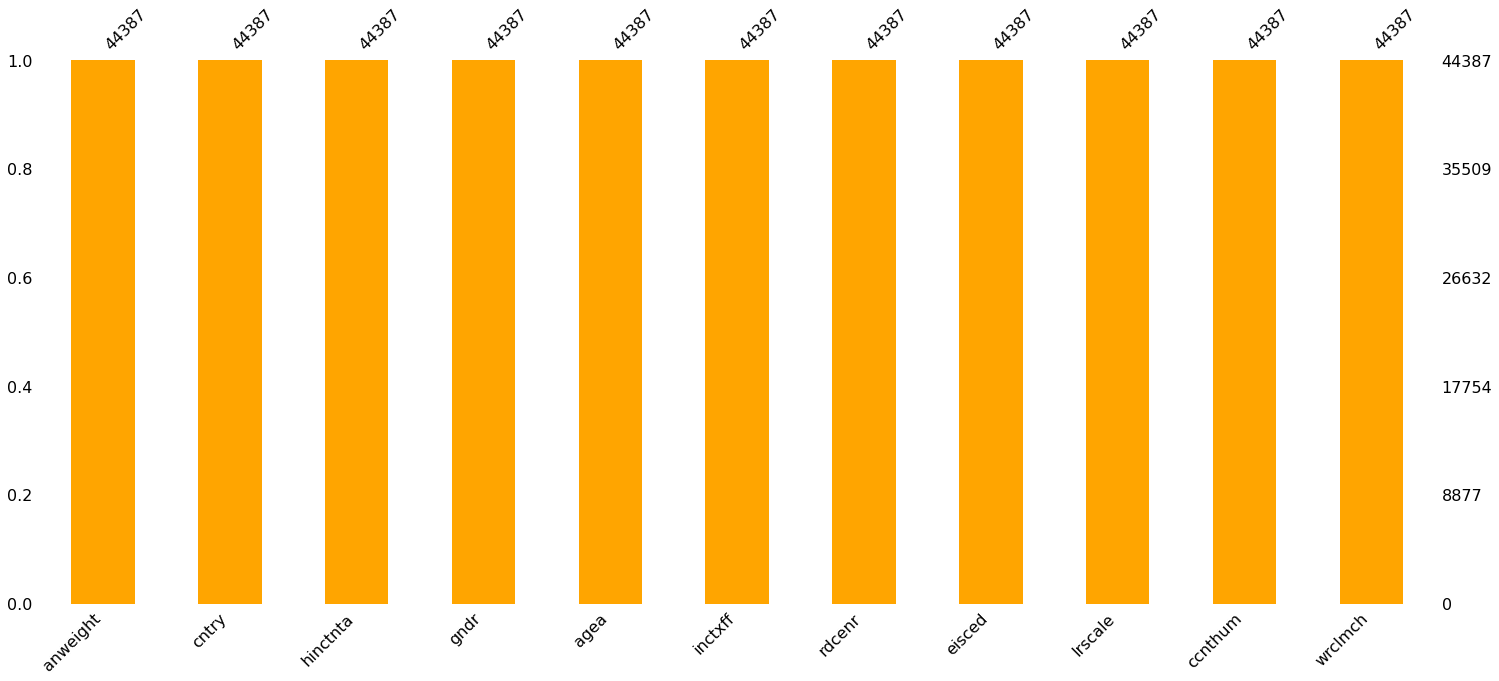

In [377]:
msno.bar(d, color='orange')

In [378]:
d.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [379]:
d.head()

,anweight,cntry,hinctnta,gndr,agea,inctxff,rdcenr,eisced,lrscale,ccnthum,wrclmch
0,0.436506,AT,77,2,34,1,4,7,0,4,4
1,0.333158,AT,5,1,52,1,5,4,1,4,4
2,0.116953,AT,2,2,68,4,4,3,5,4,4
3,0.174999,AT,4,1,54,3,4,3,0,3,3
4,0.832164,AT,2,2,20,3,6,3,5,4,4


In [380]:
d.cntry.value_counts()

DE    2852
IE    2757
IT    2626
IL    2557
RU    2430
CZ    2269
LT    2122
FR    2070
EE    2019
AT    2010
GB    1959
ES    1958
FI    1925
BE    1766
PL    1694
NL    1681
HU    1614
SE    1551
NO    1545
CH    1525
SI    1307
PT    1270
IS     880
Name: cntry, dtype: int64

In [381]:
d.hinctnta.value_counts()

77    4990
3     4136
2     4021
4     4017
5     3958
7     3918
6     3851
8     3686
1     3678
88    2902
9     2684
10    2496
99      50
Name: hinctnta, dtype: int64

In [382]:
d.gndr.value_counts()

2    23351
1    21027
9        9
Name: gndr, dtype: int64

In [383]:
d.agea.value_counts()

60     821
51     820
59     806
65     794
52     793
      ... 
96       5
99       3
98       3
97       3
100      1
Name: agea, Length: 87, dtype: int64

In [384]:
d.eisced.value_counts()

4     8720
2     7388
3     7153
5     6275
7     6013
6     4760
1     3861
55      88
77      82
88      39
99       8
Name: eisced, dtype: int64

In [385]:
d.lrscale.value_counts()

5     12389
88     4305
7      4269
6      4105
4      3780
3      3754
8      3265
2      2121
10     1592
77     1487
0      1463
9       999
1       846
99       12
Name: lrscale, dtype: int64

In [386]:
d.wrclmch.value_counts()

3    19729
4     9649
2     8493
1     2590
5     2193
6     1317
8      364
7       29
9       23
Name: wrclmch, dtype: int64

In [387]:
d.inctxff.value_counts()

4    10766
2    10559
3     9714
5     8034
1     3328
8     1870
7      112
9        4
Name: inctxff, dtype: int64

In [388]:
d.rdcenr.value_counts()

4     13186
5     10920
3      9764
6      6598
2      2337
1      1031
88      285
55      233
77       24
99        9
Name: rdcenr, dtype: int64

In [389]:
d.anweight.value_counts()

0.123189    178
0.143850    172
0.117111    170
0.065006    130
0.090705    123
           ... 
2.011126      1
1.913886      1
2.074527      1
1.706736      1
0.134491      1
Name: anweight, Length: 15811, dtype: int64

# Clean the dataset

In [390]:
cleanup = {"hinctnta":     {77: np.nan ,88: np.nan, 99: np.nan},
           "lrscale":      {77: np.nan ,88: np.nan, 99: np.nan},
           #1.0:0, 2.0:0, 3.0:1, 4.0:1, 5.0:1
           "ccnthum":      {1.0:1, 2.0:1, 3.0:2, 4.0:2, 5.0:2,66:np.nan, 77: np.nan ,88: np.nan, 99: np.nan, 55:np.nan},
           "eisced":       {77: np.nan ,88: np.nan, 99: np.nan, 55:np.nan},
           "gndr":       {2: 0, 9:np.nan},
           #"cntry": {'BG':1, 'FR': 2, 'CZ':3, 'FI': 4, 'EE':5, 'HU': 6, 'LT':7, 'HR': 8, 'SI':9, 'SK': 10 },
           "wrclmch": {1:1,2:1,3:1,4:0,5:0, 6: np.nan ,7: np.nan, 8: np.nan, 9:np.nan},
           "rdcenr": {55: np.nan ,77: np.nan ,88: np.nan, 99: np.nan},
           "inctxff": {7: np.nan ,8: np.nan, 9: np.nan}
           }

In [391]:
d = d.replace(cleanup)

In [392]:
d.dropna(inplace=True)

In [176]:
#d.cntry = pd.Categorical(d.cntry)
#d['cntry'] = d.cntry.cat.codes

In [393]:
d['wrclmch'] = d['wrclmch'].astype(int)
d['ccnthum'] = d['ccnthum'].astype(int)

In [394]:
d.ccnthum.value_counts() # 1 natural reason, 2 human

2    27783
1     2575
Name: ccnthum, dtype: int64

In [395]:
d.wrclmch.value_counts() # 1 not worried , 0 worried

1    21459
0     8899
Name: wrclmch, dtype: int64

In [396]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [397]:
cols_to_norm = ['hinctnta',  'agea',
       'eisced', 'lrscale','rdcenr','inctxff']

In [398]:
d[cols_to_norm]=StandardScaler().fit_transform(d[cols_to_norm])

In [399]:
d

,anweight,cntry,hinctnta,gndr,agea,inctxff,rdcenr,eisced,lrscale,ccnthum,wrclmch
1,0.333158,AT,-0.134081,1.0,0.032307,-1.748889,0.681944,-0.081023,-1.848962,2,0
2,0.116953,AT,-1.238779,0.0,0.481545,0.680727,-0.178078,-0.624241,-0.045404,2,0
3,0.174999,AT,-0.502314,1.0,0.088462,-0.129145,-0.178078,-0.624241,-2.299851,2,1
4,0.832164,AT,-1.238779,0.0,-0.866170,-0.129145,1.541966,-0.624241,-0.045404,2,0
5,0.374608,AT,1.707081,0.0,0.397313,0.680727,-0.178078,-0.081023,-0.045404,2,1
...,...,...,...,...,...,...,...,...,...,...,...
44378,0.125447,SI,-0.502314,1.0,0.425391,-0.129145,0.681944,-0.624241,-0.045404,2,0
44379,0.101995,SI,0.970616,1.0,-0.781938,1.490598,-0.178078,-0.081023,-0.045404,2,1
44382,0.112359,SI,-0.502314,0.0,0.397313,-0.129145,0.681944,-0.081023,-1.848962,2,1
44384,0.115147,SI,0.602384,1.0,0.341158,-1.748889,1.541966,1.005413,-2.299851,2,0


In [400]:
train = d.sample(frac=0.8, random_state=25)
test = d.drop(train.index)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 24286
No. of testing examples: 6072


In [346]:
x_train = train[train.columns[0:len(train.columns)-1]]
y_train = train[train.columns[-1]]

x_test = test[test.columns[0:len(test.columns)-1]]
y_test = test[test.columns[-1]]

# Modelling

## Logistic regression

#### Without weight

In [401]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [402]:
formula = " wrclmch~ hinctnta +  agea +eisced + lrscale + C(ccnthum) + rdcenr + inctxff + C(cntry, Treatment(reference=3)) + C(gndr)"
log_reg = smf.glm(formula, data=train,family=sm.families.Binomial()).fit()

In [403]:
print(log_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                wrclmch   No. Observations:                24286
Model:                            GLM   Df Residuals:                    24255
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13331.
Date:                Sun, 04 Dec 2022   Deviance:                       26661.
Time:                        11:48:44   Pearson chi2:                 2.47e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

#### With weight

In [404]:
formula1 = " wrclmch~ hinctnta +  agea +eisced + lrscale + C(ccnthum) + rdcenr + inctxff + C(cntry, Treatment(reference=3)) + C(gndr)"
log_reg1 = smf.glm(formula1, data=train,family=sm.families.Binomial(),freq_weights=train.anweight).fit()

In [405]:
print(log_reg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                wrclmch   No. Observations:                24286
Model:                            GLM   Df Residuals:                 25400.60
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14451.
Date:                Sun, 04 Dec 2022   Deviance:                       28902.
Time:                        11:49:37   Pearson chi2:                 2.63e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [186]:
from sklearn import metrics

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn import metrics

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [188]:
logreg.coef_

array([[-0.01466116,  0.1394548 , -0.29794264, -0.04591214, -0.20356503,
         0.00195462,  0.04249988, -0.14536669,  0.74039529]])

In [206]:
predictions = logreg.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       523
           1       0.92      1.00      0.96      5664

    accuracy                           0.92      6187
   macro avg       0.46      0.50      0.48      6187
weighted avg       0.84      0.92      0.87      6187



In [192]:
print(confusion_matrix(y_test, predictions))

[[   0  523]
 [   2 5662]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


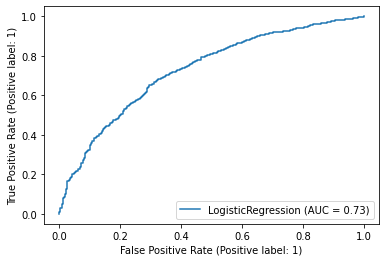

In [193]:
plot_roc_curve(logreg, x_test, y_test)

## Naive Bayes

In [196]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [197]:
predictions = gnb.predict(x_test)

In [198]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.20      0.03      0.05       523
           1       0.92      0.99      0.95      5664

    accuracy                           0.91      6187
   macro avg       0.56      0.51      0.50      6187
weighted avg       0.86      0.91      0.88      6187



In [199]:
print(confusion_matrix(y_test, predictions))

[[  15  508]
 [  61 5603]]


## Logistic with smote

In [200]:
from imblearn.over_sampling import SMOTE

In [201]:
smt = SMOTE()
x_smote, y_smote = smt.fit_resample(x_train, y_train.ravel())

In [202]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 22627
Before OverSampling, counts of label '0': 2121 

After OverSampling, the shape of train_X: (45254, 9)
After OverSampling, the shape of train_y: (45254,) 

After OverSampling, counts of label '1': 22627
After OverSampling, counts of label '0': 22627


In [207]:
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit( x_train_res, y_train_res)

LogisticRegression(random_state=0, solver='liblinear')

In [208]:
predictions = logreg.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.16      0.65      0.26       523
           1       0.96      0.69      0.80      5664

    accuracy                           0.69      6187
   macro avg       0.56      0.67      0.53      6187
weighted avg       0.89      0.69      0.76      6187



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


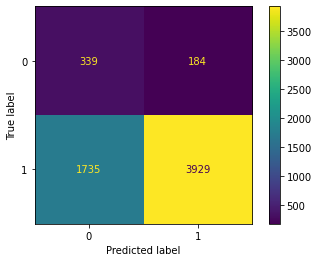

In [212]:
plot_confusion_matrix(logreg, x_test, y_test)

## Naive Bayes with SMOTE

In [213]:
gnb = GaussianNB()


# fit the model
gnb.fit(x_train_res, y_train_res)

GaussianNB()

In [214]:
predictions = gnb.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.15      0.61      0.25       523
           1       0.95      0.69      0.80      5664

    accuracy                           0.68      6187
   macro avg       0.55      0.65      0.52      6187
weighted avg       0.88      0.68      0.75      6187



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


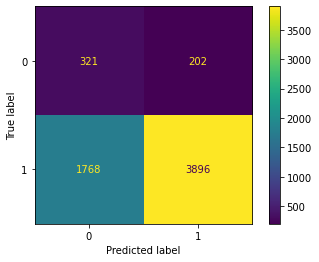

In [216]:
plot_confusion_matrix(gnb, x_test, y_test)

In [139]:
gnb.score(x_train_res, y_train_res)

0.6696715184028846